<a href="https://colab.research.google.com/github/katenjoki/Swahili-Speech-To-Text/blob/main/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## Importing Libraries

In [46]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join("../scripts")))
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import plots #plot scrpt
import warnings
warnings.filterwarnings('ignore')

In [1]:
'''import pandas as pd
def audio_test(data:pd.DataFrame,col:str,row:int):
  file=data[col].loc[row]
  plt.figure(figsize=(12,6))
  signal,sample_rate=librosa.load(file)
  librosa.display.waveplot(signal,sr=sample_rate)
  plt.xlabel('Time')
  plt.ylabel('Amplitude')
  plt.show()
  return ipd.Audio(file)'''

## Reading Data

In [4]:
mata_data_path = "../metadata.csv"

## Plotting

In [5]:
meta_data = pd.read_csv(mata_data_path)

In [7]:
meta_data.head()

,filename,transcription,filepath,sample_rate,duration
0,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,rais wa tanzania jakaya mrisho kikwete,SWH-05-20101106/SWH-05-20101106_16k-emission_s...,16000,3.14
1,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,yanayo andaliwa nami pendo pondo idhaa ya kisw...,SWH-05-20101106/SWH-05-20101106_16k-emission_s...,16000,3.10
2,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,inayokutangazia moja kwa moja kutoka jijini da...,SWH-05-20101106/SWH-05-20101106_16k-emission_s...,16000,3.65
3,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,juma hili bara la afrika limeshuhudia raia wa ...,SWH-05-20101106/SWH-05-20101106_16k-emission_s...,16000,3.90
4,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,wakipiga kura ya maoni ilikufanya mabadiliko ya,SWH-05-20101106/SWH-05-20101106_16k-emission_s...,16000,2.94


In [8]:
meta_data['sample_rate'].value_counts()

16000    10180
Name: sample_rate, dtype: int64

In [17]:
duration_df = meta_data[['duration', 'filename']]

In [18]:
duration_df.describe()

,duration
count,10180.000000
mean,3.504845
std,1.024975
min,2.159750
25%,2.650000
50%,3.279906
75%,4.179953
max,6.150000


###  the max duration is 6.1s
### the min duration is also 2.1s

<Figure size 648x504 with 0 Axes>

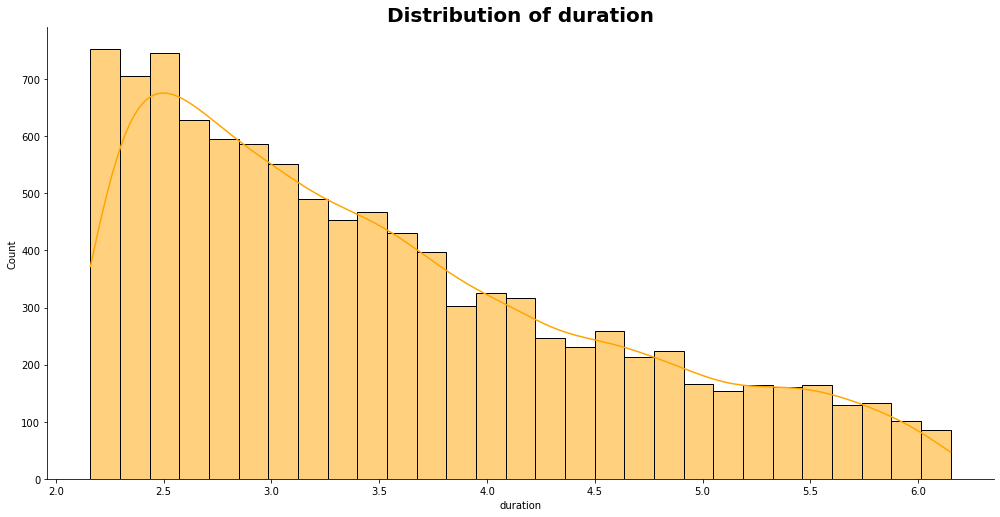

In [19]:
plots.plot_hist(duration_df, 'duration', 'orange')

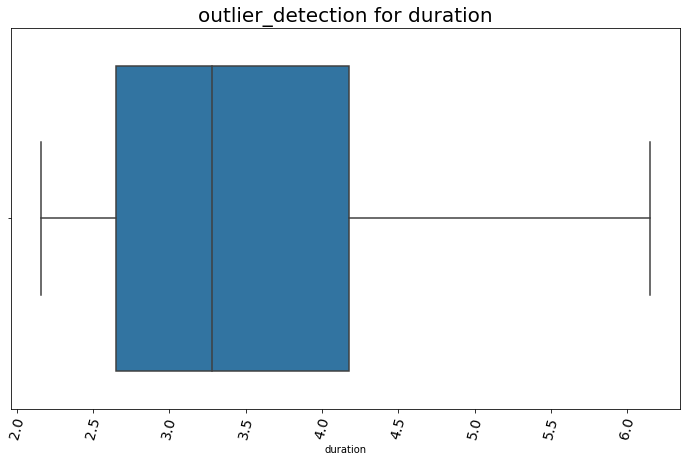

In [20]:
plots.plot_box(duration_df, 'duration', 'outlier_detection for duration')

In [33]:
long_audios = duration_df.sort_values(by="duration", ascending=False).head()
print("long_audios")
display(long_audios)

short_audios = duration_df.sort_values(by="duration", ascending=True).head()
print("short audios")
display(short_audios)

long_audios


,duration,filename
1181,6.150000,SWH-05-20101111_emission_swahili_05h30_-_06h00...
3111,6.140125,SWH-05-20110317_16k-emission_swahili_05h30_-_0...
164,6.140000,SWH-05-20101106_16k-emission_swahili_05h30_-_0...
9182,6.140000,SWH-15-20110224_16k-emission_swahili_15h00_-_1...
3063,6.140000,SWH-05-20110215_16k-emission_swahili_05h30_-_0...


short audios


,duration,filename
10036,2.159750,SWH-15-20110310_16k-emission_swahili_15h00_-_1...
7043,2.159875,SWH-15-20101227_16k-emission_swahili_15h00_-_1...
5331,2.159875,SWH-15-20101113_16k-emission_swahili_15h00_-_1...
6969,2.159875,SWH-15-20101227_16k-emission_swahili_15h00_-_1...
1800,2.159937,SWH-05-20101121_16k-emission_swahili_05h30_-_0...


In [62]:
def remove_space(snt: str) -> str:
    sent_list =snt.split(' ')
    return ''.join(sent_list)

In [63]:
meta_data['trans_len'] = meta_data['transcription'].apply(lambda x: len(remove_space(x)))

,trans_len
count,10180.000000
mean,48.646464
std,19.181515
min,5.000000
25%,36.000000
50%,46.000000
75%,60.000000
max,121.000000


<Figure size 648x504 with 0 Axes>

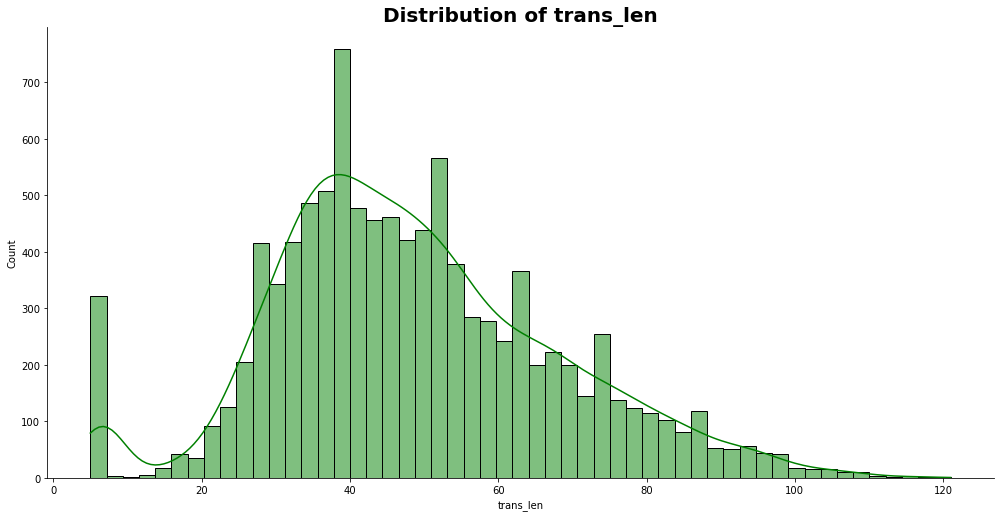

long transaltions


,trans_len,filename
6061,121,SWH-15-20101117_16k-emission_swahili_15h00_-_1...
9770,117,SWH-15-20110310_16k-emission_swahili_15h00_-_1...
6434,116,SWH-15-20101117_16k-emission_swahili_15h00_-_1...
93,116,SWH-05-20101106_16k-emission_swahili_05h30_-_0...
6380,116,SWH-15-20101117_16k-emission_swahili_15h00_-_1...


short transaltions


,trans_len,filename
922,5,SWH-05-20101110_16k-emission_swahili_15h00_-_1...
3946,5,SWH-15-20101103_emission_swahili_15h00_-_16h00...
9819,5,SWH-15-20110310_16k-emission_swahili_15h00_-_1...
5371,5,SWH-15-20101113_16k-emission_swahili_15h00_-_1...
9448,5,SWH-15-20110303_16k-emission_swahili_15h00_-_1...


In [66]:
trans_df = meta_data[['trans_len', 'filename']]
display(trans_df.describe())
plots.plot_hist(trans_df, 'trans_len', 'green')

long_chars = trans_df.sort_values(by="trans_len", ascending=False).head()
print("long transaltions")
display(long_chars)

short_chars = trans_df.sort_values(by="trans_len", ascending=True).head()
print("short transaltions")
display(short_chars)

In [69]:
meta_data['char_per_sec'] = meta_data['trans_len']/meta_data['duration']

In [70]:
meta_data

,filename,transcription,filepath,sample_rate,duration,trans_len,char_per_sec
0,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,rais wa tanzania jakaya mrisho kikwete,SWH-05-20101106/SWH-05-20101106_16k-emission_s...,16000,3.140000,33,10.509554
1,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,yanayo andaliwa nami pendo pondo idhaa ya kisw...,SWH-05-20101106/SWH-05-20101106_16k-emission_s...,16000,3.100000,44,14.193548
2,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,inayokutangazia moja kwa moja kutoka jijini da...,SWH-05-20101106/SWH-05-20101106_16k-emission_s...,16000,3.650000,57,15.616438
3,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,juma hili bara la afrika limeshuhudia raia wa ...,SWH-05-20101106/SWH-05-20101106_16k-emission_s...,16000,3.900000,49,12.564103
4,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,wakipiga kura ya maoni ilikufanya mabadiliko ya,SWH-05-20101106/SWH-05-20101106_16k-emission_s...,16000,2.940000,41,13.945578
...,...,...,...,...,...,...,...
10175,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,na somo lile lililopokelewa kule kenya,SWH-15-20110310/SWH-15-20110310_16k-emission_s...,16000,2.500062,33,13.199670
10176,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,ambapo mtu aliyeshindwa kwenye uchaguzi,SWH-15-20110310/SWH-15-20110310_16k-emission_s...,16000,2.910000,35,12.027491
10177,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,ni kauli yake mchambuzi wa masuala ya siasa,SWH-15-20110310/SWH-15-20110310_16k-emission_s...,16000,2.950000,36,12.203390
10178,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,mwanasheria anayemtetea rais wa zamani wa liberia,SWH-15-20110310/SWH-15-20110310_16k-emission_s...,16000,2.590000,43,16.602317


,char_per_sec
count,10180.000000
mean,13.881525
std,3.485455
min,0.967118
25%,12.280702
50%,14.320398
75%,16.136141
max,26.546661


<Figure size 648x504 with 0 Axes>

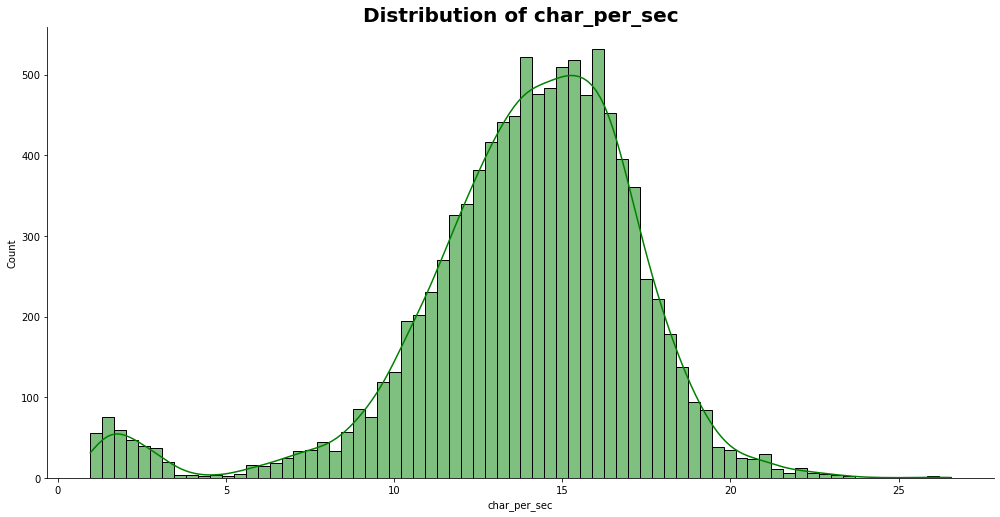

In [72]:
char_per_sec_df = meta_data[['char_per_sec', 'filename']]
display(char_per_sec_df.describe())
plots.plot_hist(char_per_sec_df, 'char_per_sec', 'green')

In [75]:
# lambda x: len(x.split(' '))